##### [ ML - 생선 분류 모델 만들기 1 ]
- 주  제 : 2개 종류 생선 분류 모델 만들기
- 학습종류 : 지도 학습 => 분류
- 학습방법 : 다양한 알고리즘들 => kNN 최근접 이웃 알고리즘

- 데이터셋
    * 학습용 데이터셋
        - 모델 학습에 즉, 데이터 규칙/패턴을 찾기위해서 사용되는 데이터셋

    * 검증용 데이터셋
        - 모델 학습 중 제대로 규칙/패턴을 찾고 있는지 검사하기 위한 데이터셋
        - scikit-learn은 fit() 메서드로 학습이 종료되어 **사용할 수 없음**
        - 교차검증, 일부 학습 알고리즘에서는 사용가능

    * 테스트용 데이터셋
        - 학습 완료 후 성능검사에 사용되는 데이터셋
        - 추가 학습 진행 여부 결정 기준이 됨!
        - ***★ 절대 학습에 사용되면 안됨 ★***


[1] 데이터 확인 : 피쳐와 타겟 <HR>

In [44]:
## [1] 모률 로딩 데이터 확인
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 학습 알고리즘 모델
from sklearn.neighbors import KNeighborsClassifier

## 데이터셋 관련
from sklearn.model_selection import train_test_split

In [ ]:
## [1-2] 데이터 로딩 및 빙어와 도미 데이터만 추출
data_file = '../Data/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(data_file, usecols=[0,1,2])
display(allDF.head())

## bream도미, smelt빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 행인덱스 초기화
fishDF.reset_index(drop=True, inplace=True)


,Species,Weight,Length
0,Bream,323.587836,28.928442
1,Bream,402.087382,32.901921
2,Bream,313.261134,26.439356
3,Bream,404.993782,28.787494
4,Bream,510.314772,30.814356


In [46]:
## 품종 컬럼 타입 변환 저장

speciesSR = fishDF.Species
fishDF.Species=speciesSR.astype('category')

In [47]:
## 전체 데이터 타입 확인
fishDF.info()

## 카테고리 접근자 cat 사용
print(f'[categories] => {fishDF.Species.cat.categories}')
print(f'[codes] => \n{fishDF.Species.cat.codes}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  1000 non-null   category
 1   Weight   1000 non-null   float64 
 2   Length   1000 non-null   float64 
dtypes: category(1), float64(2)
memory usage: 16.9 KB
[categories] => Index(['Bream', 'Smelt'], dtype='object')
[codes] => 
0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Length: 1000, dtype: int8


[2] 피쳐/데이터와 타겟/라벨 분리<hr>

In [48]:
## 학습용 피쳐/데이터와 타겟/라벨 분리
## -> 피쳐/데이터 : 2D 
featureDF = fishDF[fishDF.columns[1:]]

## -> 타겟/라벨 : 1D
targetSR = fishDF[fishDF.columns[0]]

print(f'featureDF : {featureDF.ndim}D, targetSR : {targetSR.ndim}D, ')

featureDF : 2D, targetSR : 1D, 


[3] 학습용, 데이터용 데이터셋 분리<hr>
- 일반적 => 학습용 : 테스트용 = 8:2
- 수집된 데이터에 따라서 학습용 데이터셋 비율 설정
- scikit-learn 기본값 => 7.5 : 2.5

In [ ]:
## tarin_test_split(2D피쳐, 1D 타겟, ....) => 반환 4개 원소 튜플
## 매개변수
## -> test_size     = 0.25 [기본값]  
## -> train_size    = 0.75 [기본값]
## -> random_state  = None [기본값] : 전달한 데이터셋 섞어서 추출
## -> stratify      = None [기본값] : 분류 학습 시 꼭 필수 설정, 데이터를 동일 비율 설정
x_train, x_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)

## 학습용, 테스트용 데이터 수
print(f'학습용   : {x_train.ndim}D,  {y_train.ndim}D, ')
print(f'테스트용 : {x_test.ndim}D,  {y_test.ndim}D, ')

## 2개 라벨/클래스 Bream, Smelt
targetL = (targetSR.value_counts()/targetSR.shape[0]).to_list()
trainL = (y_train.value_counts()/y_train.shape[0]).to_list()
testL = (y_test.value_counts()/y_test.shape[0]).to_list()

print(f'[Target] Bream : Smelt = {targetL[0]:.1f} : {targetL[1]:.1f}')
print(f'[Train] Bream : Smelt = {trainL[0]:.1f} : {trainL[1]:.1f}')
print(f'[Test] Bream : Smelt = {testL[0]:.1f} : {testL[1]:.1f}')

# print(f'학습용 비율 : {x_train.value_counts}')

학습용   : 2D,  1D, 
테스트용 : 2D,  1D, 
[Target] Bream : Smelt = 0.7 : 0.3
[Train]  Bream : Smelt = 0.7 : 0.3
[Test]   Bream : Smelt = 0.7 : 0.3


[4] 학습진행 ===> 학습용 데이터 셋<hr>
- 학습 알고리즘의 기본 설정값 그대로 학습 진행 => 성능 점수 : 베이스 점수/ 최저점수/ 기준 점수
- 성능 향상 위한 하이퍼 파라미터 값 변경 및 최적의 값 찾기

In [50]:
scoreDict = {'Train': [], "Test" : []}
## 최적 성능의 k 즉, n_neighbors 찾기
for k in range(1, x_train.shape[0] + 1) : 

    ## - 모델 인스턴스 생성
    kModel = KNeighborsClassifier(n_neighbors=k)
    
    ## - 모델 학습 : 학습용 데이터셋
    kModel.fit(x_train, y_train)
    
    ## - 모델 성능평가 : 테스툥 데이터셋
    train_score = kModel.score(x_train, y_train)
    test_score = kModel.score(x_test, y_test)
    print(f'[{k}] train-score : {train_score:.6f} / test-score : {test_score:.6f}')
    
    ## 성능 비교를 위한 저장
    scoreDict['Train'].append(train_score)
    scoreDict['Test'].append(test_score)

[1] train-score : 1.000000 / test-score : 0.875000
[2] train-score : 0.912500 / test-score : 0.865000
[3] train-score : 0.915000 / test-score : 0.885000
[4] train-score : 0.888750 / test-score : 0.875000
[5] train-score : 0.905000 / test-score : 0.870000
[6] train-score : 0.887500 / test-score : 0.880000
[7] train-score : 0.897500 / test-score : 0.875000
[8] train-score : 0.891250 / test-score : 0.880000
[9] train-score : 0.896250 / test-score : 0.885000
[10] train-score : 0.888750 / test-score : 0.880000
[11] train-score : 0.888750 / test-score : 0.890000
[12] train-score : 0.885000 / test-score : 0.885000
[13] train-score : 0.883750 / test-score : 0.895000
[14] train-score : 0.876250 / test-score : 0.875000
[15] train-score : 0.878750 / test-score : 0.880000
[16] train-score : 0.870000 / test-score : 0.875000
[17] train-score : 0.873750 / test-score : 0.880000
[18] train-score : 0.872500 / test-score : 0.870000
[19] train-score : 0.865000 / test-score : 0.890000
[20] train-score : 0.

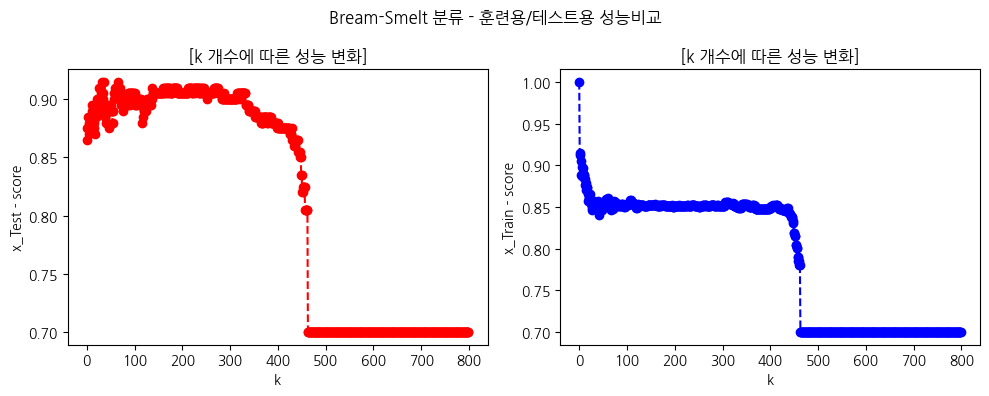

In [51]:
## k 개수에 따른 점수 시각화

plt.figure(figsize= (10,4))
plt.suptitle ('Bream-Smelt 분류 - 훈련용/테스트용 성능비교')
plt.subplot(1,2,1)
plt.plot(scoreDict['Test'], 'ro--')
plt.xlabel('k')
plt.ylabel('x_Test - score')
plt.title('[k 개수에 따른 성능 변화]')


plt.subplot(1,2,2)
plt.plot(scoreDict['Train'], 'bo--')
plt.xlabel('k')
plt.ylabel('x_Train - score')
plt.title('[k 개수에 따른 성능 변화]')

plt.tight_layout()
plt.show()

[4] 평가진행 : 테스트용 데이터/피쳐와 타겟 <hr>
- 학습용 데이터 평가 결과, 테스트용 데이터 평가결과 비교

In [52]:
kModel.score(featureDF, targetSR)

0.7

[5] 모델 활용 서비스 <hr>

In [53]:
# ## 아모 도미 또는 빙어의 길이/무게 ==> 도미와 빙어 예측
# new_data=pd.DataFrame([[278.3, 29.]], columns=fishDF.columns[1:])
# kModel.predict(new_data)

In [54]:
# w = input("생선의 무게 입력 :")
# l = input("생선의 길이 입력 :")

# new_data=pd.DataFrame([[w, l]], columns=fishDF.columns[1:])

# print(kModel.predict(new_data))
